#  HANDWRITTEN DIGIT RECOGNITION PROJECT 

<IMG src="11.jpg" width="200" height="200" align="left">


We will use a well known dataset named MNIST 784.
The dataset contains gray-scale images of hand-drawn digits, from zero through nine.
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.

In training set there are 60,000 images and in test set we have 10,000 images for testing purpuse.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml  # for downloading mnist dataset...
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# This operation can take 1-2 minutes..
mnist = fetch_openml('mnist_784')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
mnist.data.shape


(70000, 784)

### Let's define a function to see the number images in the Mnist dataset:

In [3]:
# Let it take the dataframe and index number of the dataframe as arguments.
def showimage(dframe, index):    
    some_digit = dframe.to_numpy()[index]
    some_digit_image = some_digit.reshape(28,28)

    plt.imshow(some_digit_image,cmap="binary")
    plt.axis("off")
    plt.show()

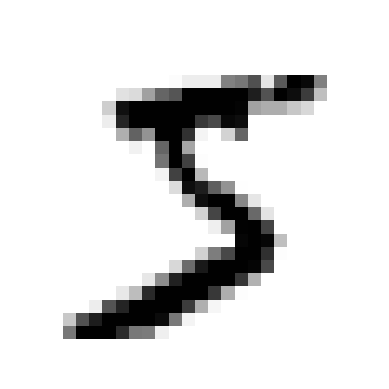

In [7]:
# Sample usage:
showimage(mnist.data, 0)

70,000 image files, 784 sizes (784 features) for each image.

### Split Data -> Training Set and Test Set

In [8]:

# test and train ratio ise 1/7 and 6/7
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [9]:
type(train_img)

pandas.core.frame.DataFrame

In [10]:
# We are copying train_img for later use (for checking results).. 
test_img_copy = test_img.copy()

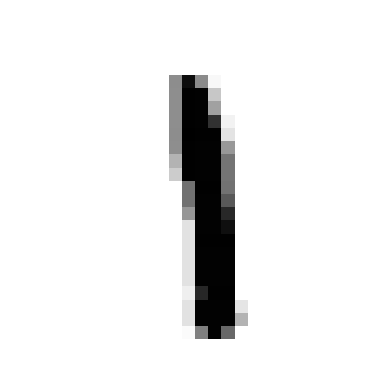

In [11]:
showimage(test_img_copy, 2)

### We need to scale our data:

Because PCA can give erroneous results in unscaled data, so we definitely go through the scaling process.
For this purpose, we use StandardScaler...

In [12]:
scaler = StandardScaler()

# We only need to make the scaler fit on the training set.
scaler.fit(train_img)

# But we need to transform both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

## Stage 1: We will apply PCA Algorithms on the dataset..

We state that we want Variance to be protected by 95%...

In [13]:
# Make an instance of the PCA Model
pca_model = PCA(.95)

In [14]:
# We only need to do PCA to the training set: (it may take 1 minute)
pca_model.fit(train_img)

PCA(n_components=0.95)

In [15]:
# Let's see how many dimensions it can reduce from 784 dimensions -> ? (preserving 95% variance of course)
print(pca_model.n_components_)

327


In [16]:
# Now let's reduce the size of both our train and test datasets from 784 to 327 with the PCA transform operation:
train_img = pca_model.transform(train_img)
test_img = pca_model.transform(test_img)

## Stage 2: Logistic Regression

Now we will apply our Logistic Regression model, which is our 2nd Machine Learning model, on our PCA-processed data.

In [17]:
# Since the default solver works very slowly, we create our logisticregression object by choosing the faster 'lbfgs' solver.
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=10000)

### We train our LogisticRegression Model using our train data:

In [18]:
# (it can take a few minutes)
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(max_iter=10000)

#### Our model has been trained, now let's perform machine learning recognition operation on handwritten digits:

In [19]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

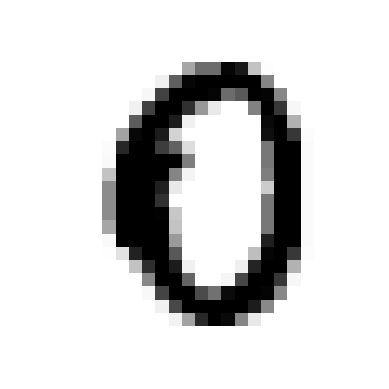

In [20]:
showimage(test_img_copy, 0)

In [21]:
logisticRegr.predict(test_img[1].reshape(1,-1))

array(['4'], dtype=object)

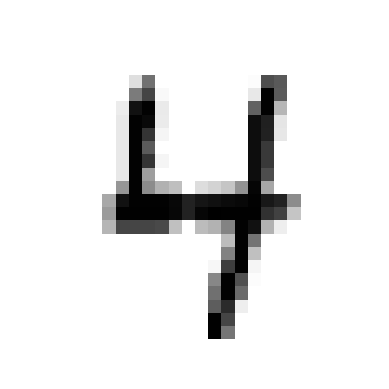

In [22]:
showimage(test_img_copy, 1)

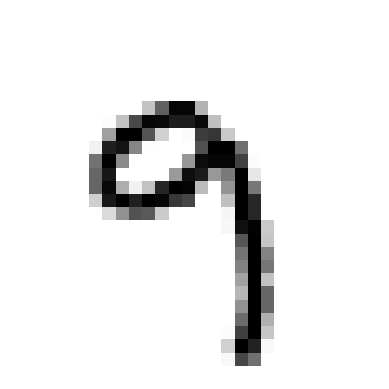

In [23]:
showimage(test_img_copy, 42)

In [24]:
logisticRegr.predict(test_img[42].reshape(1,-1))

array(['9'], dtype=object)

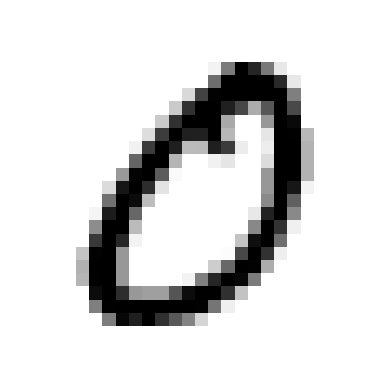

In [25]:
showimage(test_img_copy, 57)

In [26]:
logisticRegr.predict(test_img[57].reshape(1,-1))

array(['0'], dtype=object)

### Measuring the accuracy of our model

In [27]:
# We use score method for this purpose:

logisticRegr.score(test_img, test_lbl)

0.9184

### The Conclusion


In this project, we significantly shortened the training time of AI by logistic regression using PCA. I aimed to protect 95% variance. You can find out for yourself how much the time is shortened by lowering the 95% variance. The PCA algorithm, which greatly shortens the training time of artificial intelligence for 10 digits, will shorten the training time of artificial intelligence for hundreds or even thousands of different object types by hours, and this will make your programs run much faster.

With this project, we brought together 2 completely different machine learning models and accomplished a task that we can encounter in daily life by writing an artificial intelligence program on our computer!

It's a super technology when we really think about it, we can automatically recognize handwritten numbers and convert it into a digital number character that the computer can understand! If you think about it, you can come up with a wide variety of inventions and products using such technology. For example... you could develop this project a little further (including the letters in the alphabet) and create a software that automatically reads handwritten petitions and converts them to a digital Microsoft Word file or PDF file. People can automatically upload a petition that they create by taking their photo, and you can save it as text in the database. Thanks to artificial intelligence, you will have skipped many manual steps in between!
